# Задача 5

Гипотезы:

- $H_{0}$: $k = 0$,
- $H_{1}$: $k > 0$.

Критерий:
- $H_{0}$: $T(X_{test}) \leq q_{0.95}$, $q_{0.95}$ $-$ 95 перцентиль распределения статистики $T$ при $k = 0$;
- $H_{1}$: $T(X_{test}) > q_{0.95}$. 

$ T(X) = max(|\frac{x_{1}}{x_{sum}} - 0.15|, |\frac{x_{2}}{x_{sum}} - 0.2|, |\frac{x_{3}}{x_{sum}} - 0.3|, |\frac{x_{4}}{x_{sum}} - 0.35|) $

Мощность равна:
$power(k) = P(T(X_{test}) > q_{0.95}) = 1 - F_{X_{test}}(q_{0.95})$

Построим график мощности по каждому провайдеру.

Ответ: выгодно подмешивать четвертому провайдеру, так как в этом случае мощность медленнее увеличивается и следовательно выше вероятность ошибки второго рода, то есть не заметить жульничества.

Это также можно нестрого объяснить тем, что процент трафика от четвертого провайдера выше, следовательно больший траффик от него более вероятен, чем от других провайдеров.

100%|██████████| 100/100 [00:24<00:00,  4.06it/s]


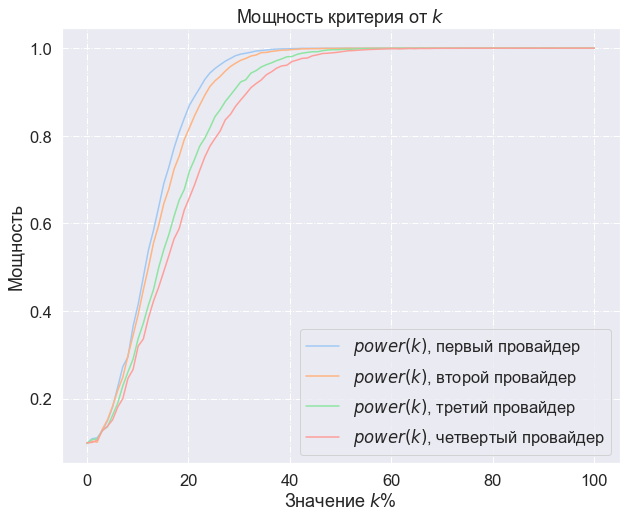

In [5]:
from scipy.spatial.distance import chebyshev, euclidean
from typing import List
import numpy as np
import sys
from scipy.stats import multinomial
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


def test_statisctic(X: List) -> float:
    # return chebyshev([x / sum(X) for x in X], [0.15, 0.2, 0.3, 0.35])
    return euclidean([x / sum(X) for x in X], [0.15, 0.2, 0.3, 0.35])


def test(n: int, alpha: float, X_test: List) -> [0, 1]:
    threshold = np.percentile(a=[test_statisctic(rv) for rv in multinomial.rvs(n, p=[0.15, 0.2, 0.3, 0.35], size=10000)], q=95)
    return 0 if test_statisctic(X_test) <= threshold else 1


def set_plot_style(title='', xlabel='', ylabel='', is_single=True):
    if is_single:
        plt.figure(figsize=(10, 8))

    sns.set_theme(context='notebook', 
        palette='pastel',
        font='arial',
        font_scale=1.5)

    if is_single:
        plt.grid(True, linestyle='-.')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.minorticks_on()

np.random.seed(100500)
threshold = np.percentile(a=[test_statisctic(rv) for rv in multinomial.rvs(100, p=[0.15, 0.2, 0.3, 0.35], size=10000)], q=95)

set_plot_style('Мощность критерия от $k$', 'Значение $k$%', 'Мощность')

xs = []
ys = []

for k in tqdm(np.linspace(0, 1, 100)):
    xs.append(k * 100)
    
    x1, x2, x3, x4 = (.15 + k) / (k + 1), .2 / (k + 1), \
        .3 / (k + 1), .35 / (k + 1)
    
    test_x = np.array([test_statisctic(rv) for rv in multinomial.rvs(100, p=[x1, x2, x3, x4], size=10000)])
    
    ys.append(sum(test_x[test_x > threshold]) / sum(test_x))

plt.plot(xs, ys, label=r"$power(k)$, первый провайдер")

xs = []
ys = []

for k in tqdm(np.linspace(0, 1, 100)):
    xs.append(k * 100)
    
    x1, x2, x3, x4 = .15 / (k + 1), (.2 + k) / (k + 1), \
        .3 / (k + 1), .35 / (k + 1)
    
    test_x = np.array([test_statisctic(rv) for rv in multinomial.rvs(100, p=[x1, x2, x3, x4], size=10000)])
    
    ys.append(sum(test_x[test_x > threshold]) / sum(test_x))

plt.plot(xs, ys, label=r"$power(k)$, второй провайдер")

xs = []
ys = []

for k in tqdm(np.linspace(0, 1, 100)):
    xs.append(k * 100)
    
    x1, x2, x3, x4 = .15 / (k + 1), .2 / (k + 1), \
        (.3 + k) / (k + 1), .35 / (k + 1)
    
    test_x = np.array([test_statisctic(rv) for rv in multinomial.rvs(100, p=[x1, x2, x3, x4], size=10000)])
    
    ys.append(sum(test_x[test_x > threshold]) / sum(test_x))

plt.plot(xs, ys, label=r"$power(k)$, третий провайдер")

xs = []
ys = []

for k in tqdm(np.linspace(0, 1, 100)):
    xs.append(k * 100)
    
    x1, x2, x3, x4 = .15 / (k + 1), .2 / (k + 1), \
        .3 / (k + 1), (.35 + k) / (k + 1)
    
    test_x = np.array([test_statisctic(rv) for rv in multinomial.rvs(100, p=[x1, x2, x3, x4], size=10000)])
    
    ys.append(sum(test_x[test_x > threshold]) / sum(test_x))

plt.plot(xs, ys, label=r"$power(k)$, четвертый провайдер")

plt.legend()
plt.show()